# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Reading the data

In [2]:

train=pd.read_csv('neo.csv')

In [4]:
train.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
train.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


# 3. Visualising the data

<Axes: >

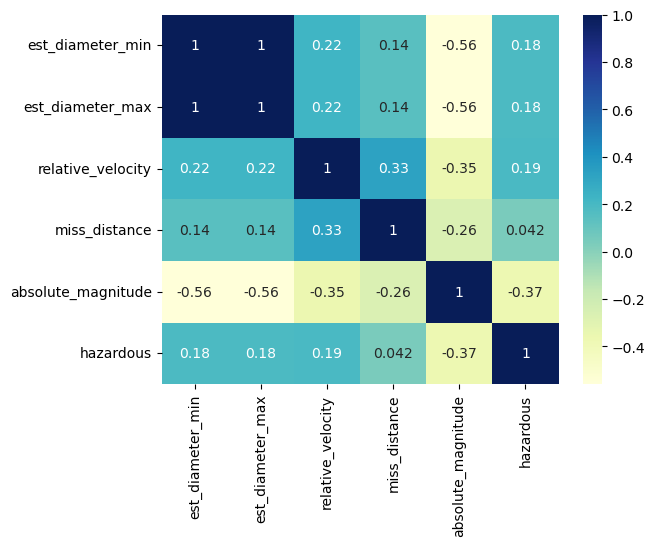

In [7]:

X=train[['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude','hazardous']]
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True)  #1. generating heatmap


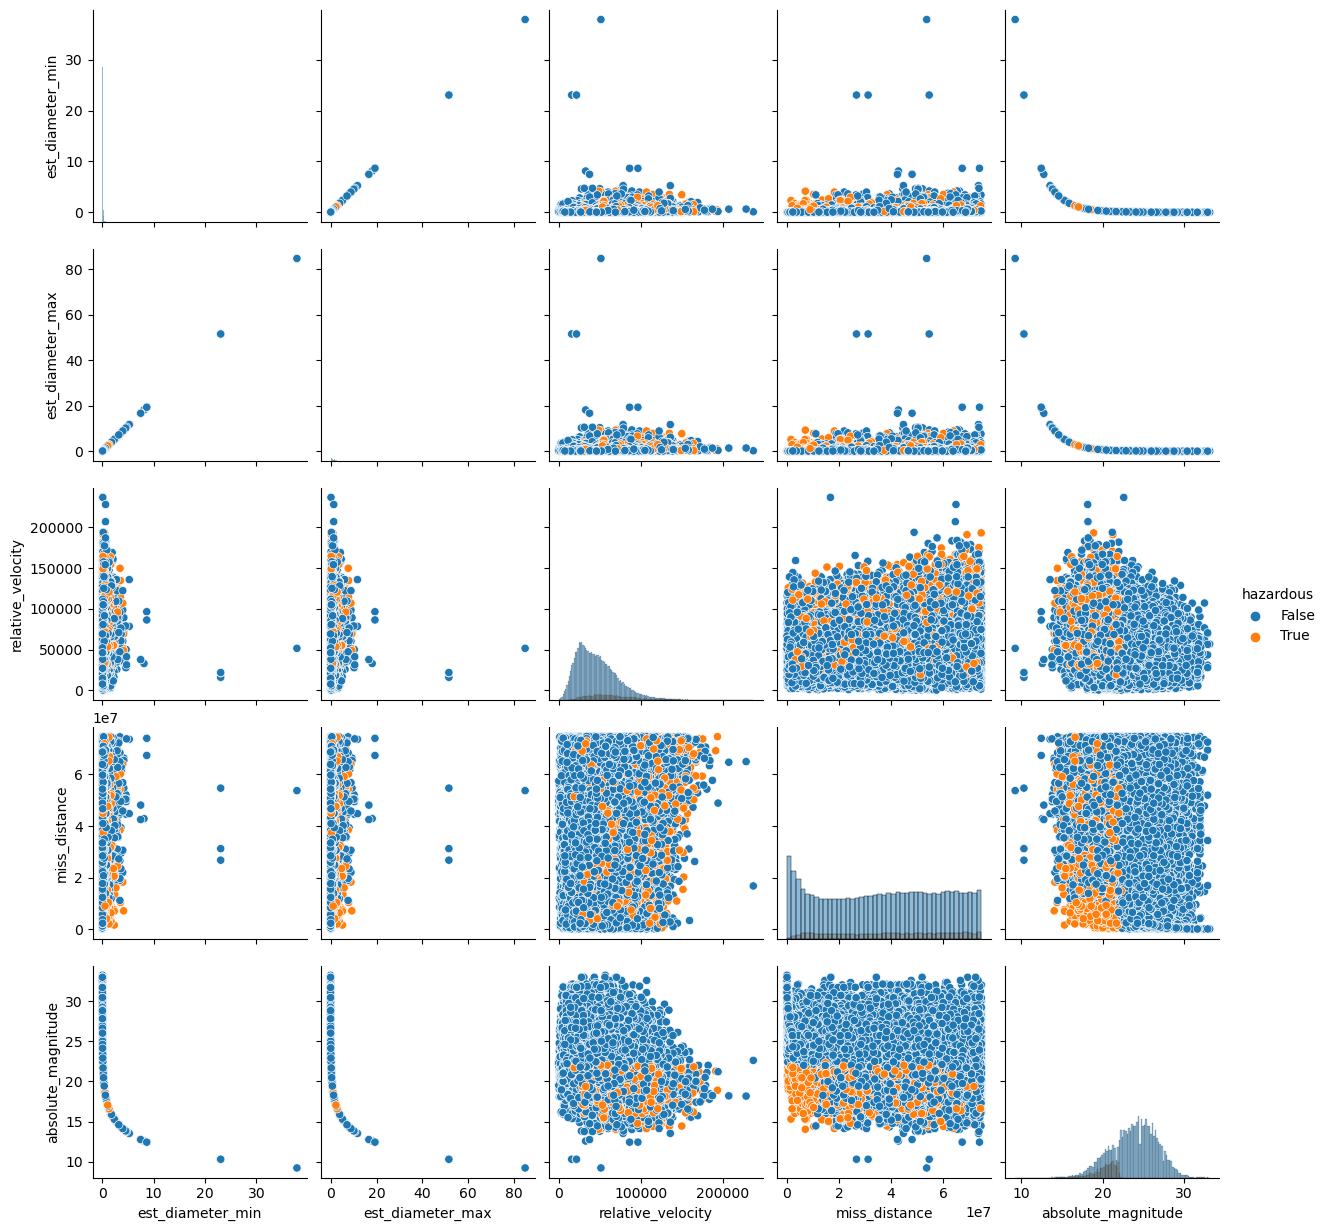

In [9]:
sns.pairplot(data=X,hue='hazardous',diag_kind='hist')

In [8]:
train.isnull().sum()  #hence it can be concluded that there are no missing values in the dataset

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
train['orbiting_body'].value_counts() #orbiting body is always earth

Earth    90836
Name: orbiting_body, dtype: int64

In [10]:
train['sentry_object'].value_counts() #sentry_object is always False

False    90836
Name: sentry_object, dtype: int64

<Axes: >

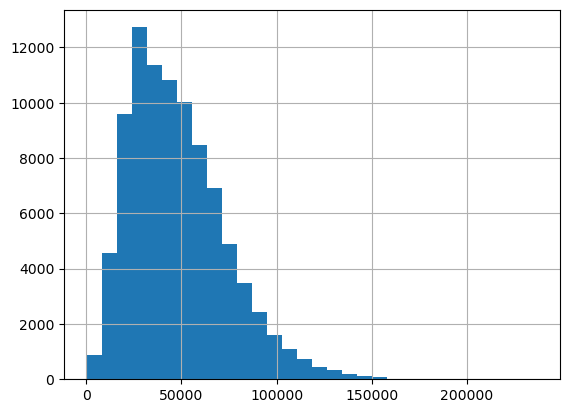

In [11]:
train['relative_velocity'].hist(bins=30)

<Axes: >

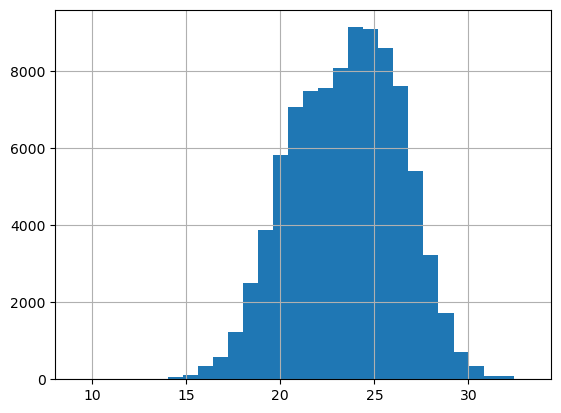

In [12]:
train['absolute_magnitude'].hist(bins=30)

<Axes: xlabel='hazardous', ylabel='count'>

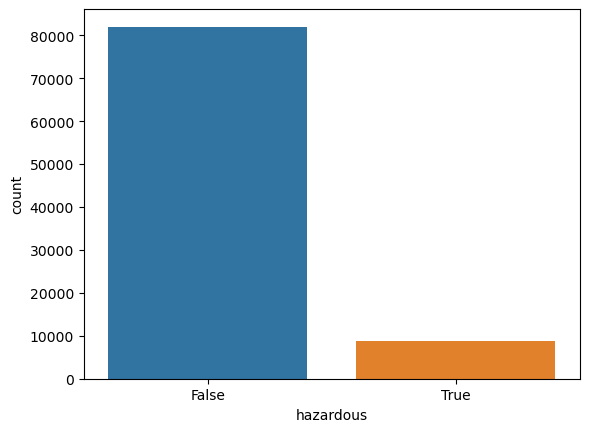

In [13]:
sns.countplot(data=train,x='hazardous')  #dataset is unbalanced

In [14]:
train['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [3]:
train['new haz']=pd.get_dummies(train['hazardous'],drop_first=True)
train['new orb']=pd.get_dummies(train['orbiting_body'])
train['new sentry']=pd.get_dummies(train['sentry_object'])

In [4]:
Y=train['new haz']
X=train.drop(['id','name','hazardous','orbiting_body','sentry_object','new haz'],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
train_feat = pd.DataFrame(scaled_features,columns=X.columns)
train_feat.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,new orb,new sentry
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,0.0,0.0
1,0.463529,0.463529,1.009040,1.090357,-1.218735,0.0,0.0
2,1.991887,1.991887,2.616983,0.569624,-1.968544,0.0,0.0
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,0.0,0.0
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,0.0,0.0


In [6]:
X=train_feat

# 4. Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# 5.Using SVM

In [9]:
kernels=['linear', 'poly', 'gaussian', 'sigmoid', 'rbf']
scores=['precision','f1']

In [10]:
from sklearn.svm import SVC

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [15]:
kernel='rbf'                     #1
model2= SVC(kernel=kernel)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

f1=f1_score(y_test, y_pred, average='weighted')
p=precision_score(y_test,y_pred,average='weighted')
print("Kernel:",kernel)
print('f1 score:',f1)
print('precision score:',p)

Kernel: rbf
f1 score: 0.8782149967554633
precision score: 0.897724959131503


In [15]:
dict={}
dict[kernel]=(f1,p)

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

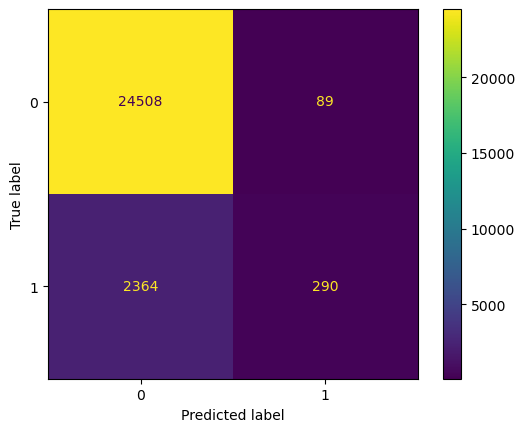

In [14]:
confusion_matrix = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV           #using grid to select best value for parameters c and gamma

In [18]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01]} 

In [19]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=  47.2s
[CV] END .....................................C=0.1, gamma=1; total time=  47.3s
[CV] END .....................................C=0.1, gamma=1; total time=  44.1s
[CV] END .....................................C=0.1, gamma=1; total time=  46.8s
[CV] END .....................................C=0.1, gamma=1; total time=  47.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  41.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  41.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  39.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=  40.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  41.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=  34.7s
[CV] END ..................................C=0.1,

In [20]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [12]:
kernel='rbf'                     #1
model2= SVC(kernel=kernel,C=1,gamma=1)
model2.fit(x_train,y_train)
grid_predictions=model2.predict(x_test)

In [13]:
f1=f1_score(y_test, grid_predictions, average='weighted')            #1 after figuring out the best values for c and gamma
p=precision_score(y_test,grid_predictions,average='weighted')
print("Kernel:",kernel)
print('f1 score:',f1)
print('precision score:',p)

Kernel: rbf
f1 score: 0.8807835806720588
precision score: 0.89596809426377


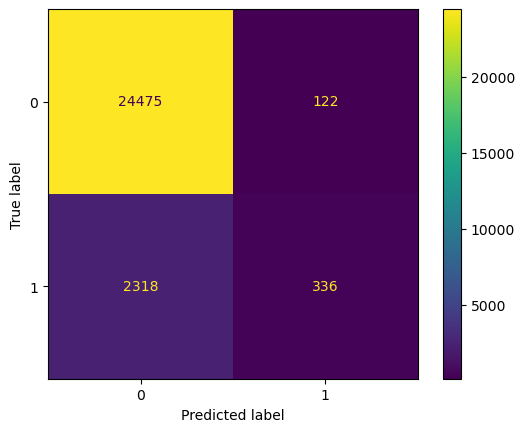

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,grid_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [14]:
dict={}
dict[kernel]=(f1,p)  #update val in dict

In [15]:
kernel='linear'                                   #2. Linear Kernel
model= SVC(kernel='linear',C=1,gamma=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

f1=f1_score(y_test, y_pred, average='weighted')
p=precision_score(y_test,y_pred,average='weighted')
print("Kernel:",kernel)
print('f1 score:',f1)
print('precision score:',p)

Kernel: linear
f1 score: 0.8564062453898333
precision score: 0.8147031487096267


C:\Users\HN085WS\anaconda3\envs\flaskenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


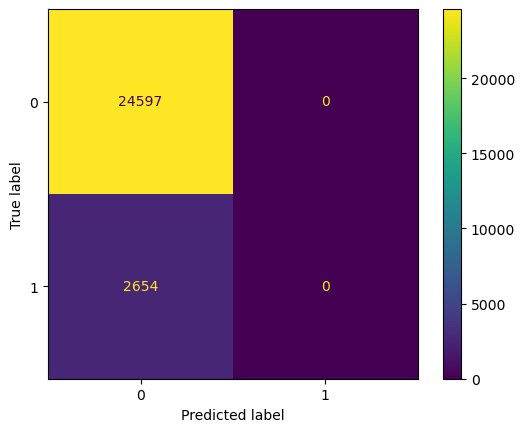

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [40]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=  43.7s
[CV] END .....................................C=0.1, gamma=1; total time=  45.8s
[CV] END .....................................C=0.1, gamma=1; total time=  42.7s
[CV] END .....................................C=0.1, gamma=1; total time=  45.3s
[CV] END .....................................C=0.1, gamma=1; total time=  46.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=  38.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  39.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  41.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=  39.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  39.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  33.7s
[CV] END ..................................C=0.1,

In [41]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [16]:
dict[kernel]=(f1,p) 

In [18]:
kernel='sigmoid'                                  #3. Sigmoid Kernel
model= SVC(kernel=kernel,C=1,gamma=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

f1=f1_score(y_test, y_pred, average='weighted')
p=precision_score(y_test,y_pred,average='weighted')
print("Kernel:",kernel)
print('f1 score:',f1)
print('precision score:',p)

Kernel: sigmoid
f1 score: 0.8357218894699451
precision score: 0.8359151532285137


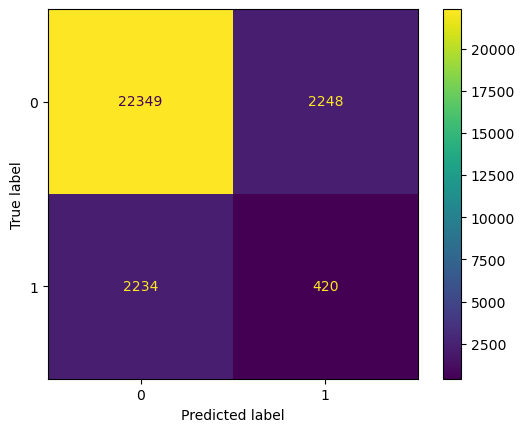

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [19]:
dict[kernel]=(f1,p) 

In [40]:
pd.DataFrame(data=dict)

,rbf,linear,sigmoid
0,0.880784,0.856406,0.835722
1,0.895968,0.814703,0.835915
